In [1]:
### basic
import sys
sys.path.append('../')
from config_sing import *
from config_func import *

### specific tools
from collections import defaultdict
from functools import reduce
import itertools as it
import sqlite3
# https://stackoverflow.com/questions/49456158/integer-in-python-pandas-becomes-blob-binary-in-sqlite
sqlite3.register_adapter(np.int64, lambda val: int(val))
sqlite3.register_adapter(np.int32, lambda val: int(val))

### file path of fragment database
fdiry = os.path.join(FD_RES, "KS91_K562_ASTARRseq", 'database')
fname = "fragment_astarr_gata1.db"
FPATH_DB_ASTARR = os.path.join(fdiry, fname)

fdiry = os.path.join(FD_RES, "Tewhey_K562_TileMPRA", 'database')
fname = "fragment_tilempra_gata1.db"
FPATH_DB_TMPRA = os.path.join(fdiry, fname)

FPATHS_DB = [FPATH_DB_ASTARR, FPATH_DB_TMPRA]

You are in: Singularity: singularity_proj_combeffect
BASE DIRECTORY:     /mount/work
PATH OF SOURCE:     /mount/work/source
PATH OF EXECUTABLE: /mount/work/exe
PATH OF ANNOTATION: /mount/work/annotation
PATH OF PROJECT:    /mount/project
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc



In [2]:
from umap             import UMAP
from sklearn.manifold import TSNE

In [3]:
fdiry = os.path.join(FD_RES, "regulatory_landscape")
os.listdir(fdiry)

['embedder_TileMPRA.P',
 '.ipynb_checkpoints',
 'embedder_TileMPRA_trn_epochs_05.P',
 'dat_annot_TileMPRA.csv',
 'dat_output_TileMPRA_zoom1.csv',
 'dat_output_TileMPRA.csv',
 'dat_output_ASTARR_zoom1.csv',
 'dat_output_ASTARR.csv',
 'dat_output_TileMPRA_1e5.csv',
 'dat_output_ASTARR_1e5.csv']

In [4]:
fdiry = os.path.join(FD_RES, "regulatory_landscape")
fname = "dat_output_ASTARR_zoom1.csv"
fpath = os.path.join(fdiry, fname)
dat_ant = pd.read_csv(fpath)

print(dat_ant.shape)
dat_ant.head()

(120000, 281)


,Sample,Count,Fragment,Chrom,Start,End,Loc,Pct_GC,Input,Output,...,Mtf_MYB/1,Mtf_HINFP1/3,Mtf_ZNF435,Mtf_POU/2,Mtf_HD/17,Mtf_HD/9,Mtf_BCL6/1,Mtf_SOX/7,Mtf_HOMEZ,Mtf_HINFP1/2
0,Output_rep1,1,chrX_48780151_48780425,chrX,48780151,48780425,48780288,0.405109,-13.575177,-14.434689,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Output_rep1,62,chrX_48780394_48780686,chrX,48780394,48780686,48780540,0.537671,-13.752054,-13.423511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Output_rep1,62,chrX_48780394_48780686,chrX,48780394,48780686,48780540,0.537671,-13.752054,-13.423511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Output_rep1,62,chrX_48780394_48780686,chrX,48780394,48780686,48780540,0.537671,-13.752054,-13.423511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Output_rep1,62,chrX_48780394_48780686,chrX,48780394,48780686,48780540,0.537671,-13.752054,-13.423511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
dat = dat_ant
lst = [col for col in dat.columns if col.startswith('Mtf')]
dat = dat[lst]
print(dat.shape)

(120000, 270)


In [7]:
dat.head()

,Mtf_FOX/1,Mtf_HD/20,Mtf_ZNF449,Mtf_RFX/1,Mtf_ZFN121,Mtf_PAX/2,Mtf_YY1,Mtf_NFKB/2,Mtf_SPZ1,Mtf_SIX/2,...,Mtf_MYB/1,Mtf_HINFP1/3,Mtf_ZNF435,Mtf_POU/2,Mtf_HD/17,Mtf_HD/9,Mtf_BCL6/1,Mtf_SOX/7,Mtf_HOMEZ,Mtf_HINFP1/2
0,0.0,0.0000,9.784,0.0,10.0911,10.2331,0.00000,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,22.3228,9.784,0.0,34.9201,41.6540,7.49225,0.0,0.0,8.4706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,22.3228,9.784,0.0,34.9201,41.6540,7.49225,0.0,0.0,8.4706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,22.3228,9.784,0.0,34.9201,41.6540,7.49225,0.0,0.0,8.4706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,22.3228,9.784,0.0,34.9201,41.6540,7.49225,0.0,0.0,8.4706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X = dat.to_numpy()
X.shape

(120000, 270)

In [11]:
%%time
ump = UMAP(metric="cosine", n_neighbors=15, n_jobs=8)
X_ump = ump.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/umap/spectral.py:261: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"
/usr/local/lib/python3.6/dist-packages/umap/spectral.py:261: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


CPU times: user 19min 53s, sys: 14.2 s, total: 20min 8s
Wall time: 4min 2s


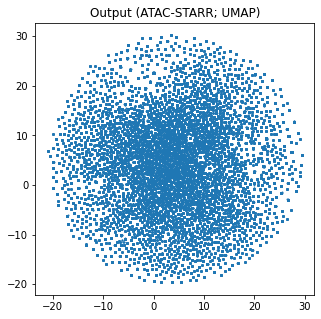

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))

x = X_ump[:,0]
y = X_ump[:,1]
ax.scatter(x, y, s=1)
ax.set_title("Output (ATAC-STARR; UMAP)")
plt.show()

In [15]:
dat_astarr=dat_ant

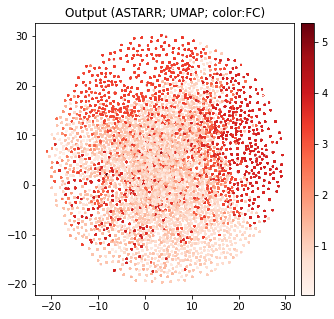

In [28]:
fig, ax = plt.subplots(figsize=(5, 5))

c = dat_astarr["Log2fc"]
c = np.exp2(c.to_numpy())
#c = c.to_numpy()

x = X_ump[:,0]
y = X_ump[:,1]

im = ax.scatter(x, y, c=c, s=1, cmap="Reds")
ax.set_title("Output (ASTARR; UMAP; color:FC)")
set_colorbar(ax, im) 
plt.show()

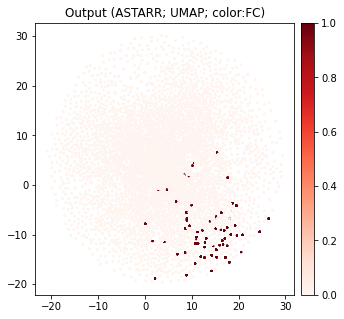

In [40]:
fig, ax = plt.subplots(figsize=(5, 5))

c = dat_astarr["Loc"]
c = (c > 48800000) & (c < (48800000+500))
#c = c.to_numpy()

x = X_ump[:,0]
y = X_ump[:,1]

im = ax.scatter(x, y, c=c, s=1, cmap="Reds")
ax.set_title("Output (ASTARR; UMAP; color:FC)")
set_colorbar(ax, im) 
plt.show()

In [41]:
np.sum(c)

1623

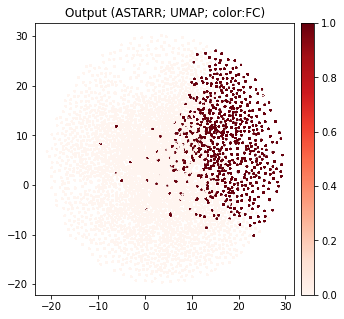

In [42]:
fig, ax = plt.subplots(figsize=(5, 5))

c = dat_astarr["Loc"]
c = (c > 48800000+500) & (c < (48800000+1000))
#c = c.to_numpy()

x = X_ump[:,0]
y = X_ump[:,1]

im = ax.scatter(x, y, c=c, s=1, cmap="Reds")
ax.set_title("Output (ASTARR; UMAP; color:FC)")
set_colorbar(ax, im) 
plt.show()

In [43]:
np.sum(c)

25552

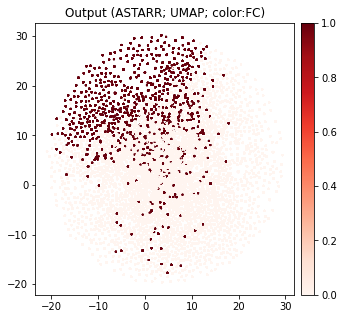

In [44]:
fig, ax = plt.subplots(figsize=(5, 5))

c = dat_astarr["Loc"]
c = (c > 48800000+1000) & (c < (48800000+2000))
#c = c.to_numpy()

x = X_ump[:,0]
y = X_ump[:,1]

im = ax.scatter(x, y, c=c, s=1, cmap="Reds")
ax.set_title("Output (ASTARR; UMAP; color:FC)")
set_colorbar(ax, im) 
plt.show()

In [45]:
np.sum(c)

25730

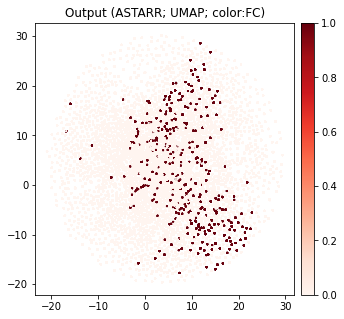

In [46]:
fig, ax = plt.subplots(figsize=(5, 5))

c = dat_astarr["Loc"]
c = (c > 48800000+2000) & (c < (48800000+3000))
#c = c.to_numpy()

x = X_ump[:,0]
y = X_ump[:,1]

im = ax.scatter(x, y, c=c, s=1, cmap="Reds")
ax.set_title("Output (ASTARR; UMAP; color:FC)")
set_colorbar(ax, im) 
plt.show()

In [47]:
np.sum(c)

8631

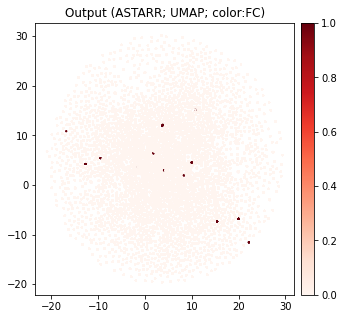

In [48]:
fig, ax = plt.subplots(figsize=(5, 5))

c = dat_astarr["Loc"]
c = (c > 48800000+3000) & (c < (48800000+4000))
#c = c.to_numpy()

x = X_ump[:,0]
y = X_ump[:,1]

im = ax.scatter(x, y, c=c, s=1, cmap="Reds")
ax.set_title("Output (ASTARR; UMAP; color:FC)")
set_colorbar(ax, im) 
plt.show()

In [49]:
np.sum(c)

251